# Function to return positional encoding for a given sequence length

In [27]:
import numpy as np

def get_positional_encoding(max_seq_len, d):
    positions = np.expand_dims(np.arange(0, max_seq_len, 1),1)
    even_indices, odd_indices = np.arange(0, d, 2), np.arange(1, d, 2)
    positional_encoding = np.apply_along_axis(pos_encod_helper, 1, positions, even_indices, odd_indices, d)
    return positional_encoding

def pos_encod_helper(x, even_indices, odd_indices, d):
    even_scores, odd_scores = np.sin(x/np.power(10000, 2*even_indices/d)), np.cos(x/np.power(10000, 2*odd_indices/d))
    result = np.zeros(d)
    result[even_indices] = even_scores
    result[odd_indices] = odd_scores
    return result

positional_encoding = get_positional_encoding(2000, 512)
print(positional_encoding[:3, :])

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.69695009e-01  8.01961795e-01 ...  1.00000000e+00
   1.07460783e-08  1.00000000e+00]
 [ 9.09297427e-01 -3.50895194e-01  9.58144376e-01 ...  1.00000000e+00
   2.14921566e-08  1.00000000e+00]]


Plot these

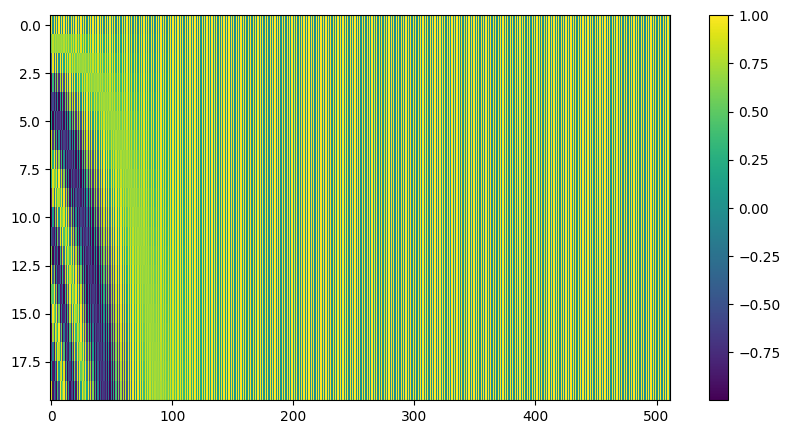

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 5))  # Adjust the size as needed

# Plot heatmap
plt.imshow(positional_encoding, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar()  # Add color bar to show the scale
plt.show()


# Grab word-to-word distance matrix

In [28]:
from scipy.spatial.distance import cdist

# Compute pairwise Euclidean distances
distances = cdist(positional_encoding, positional_encoding, metric='euclidean')

print(distances.shape)

(2000, 2000)


# Visualize distance matrix

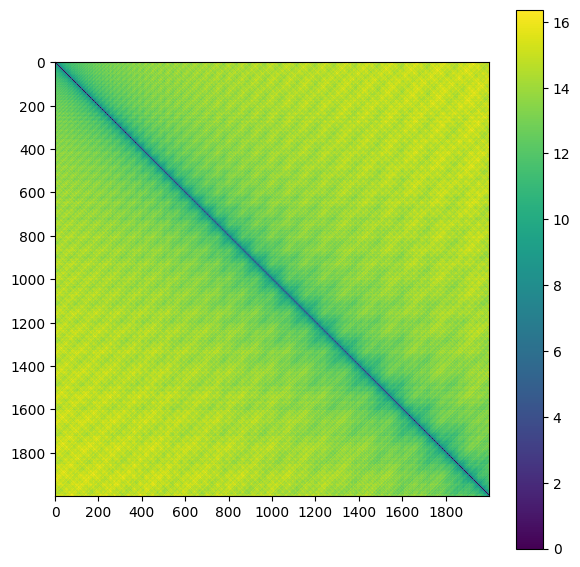

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(7, 7))  # Adjust the size as needed

# Plot heatmap
plt.imshow(distances, cmap='viridis', interpolation='nearest')
plt.colorbar()  # Add color bar to show the scale

n = distances.shape[0]

# Set xticks and yticks to auto with integer labels
plt.xticks(np.arange(0, n, 200), np.arange(0, n, 200))
plt.yticks(np.arange(0, n, 200), np.arange(0, n, 200))


plt.show()


# Plot distances from word-0, i.e. 1$^{st}$ word.

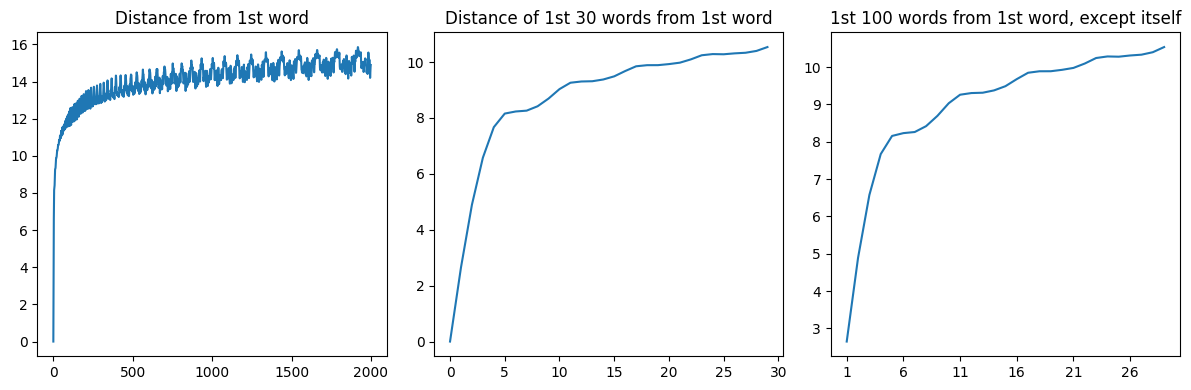

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].plot(distances[0])
ax[1].plot(distances[0, :30])
ax[2].plot(distances[0, 1:30])

ax[2].set_xticks(np.arange(0, 30, 5), np.arange(1, 31, 5))

# Set titles and labels for each subplot
ax[0].set_title('Distance from 1st word')
ax[1].set_title('Distance of 1st 30 words from 1st word')
ax[2].set_title('1st 100 words from 1st word, except itself')

plt.tight_layout()

plt.show()

In [40]:
distances[0, 1:30]

array([ 2.65003902,  4.89302863,  6.57678204,  7.67035963,  8.15619938,
        8.23143856,  8.26135413,  8.417774  ,  8.69342357,  9.0318035 ,
        9.2600894 ,  9.30450911,  9.3135705 ,  9.37608043,  9.48838206,
        9.67774852,  9.84820993,  9.88789134,  9.88895069,  9.92683189,
        9.97760253, 10.09504812, 10.24291551, 10.28489552, 10.27815887,
       10.31069467, 10.33218956, 10.39796096, 10.53626183])

# Do the same for the 1000$^{th}$ word.

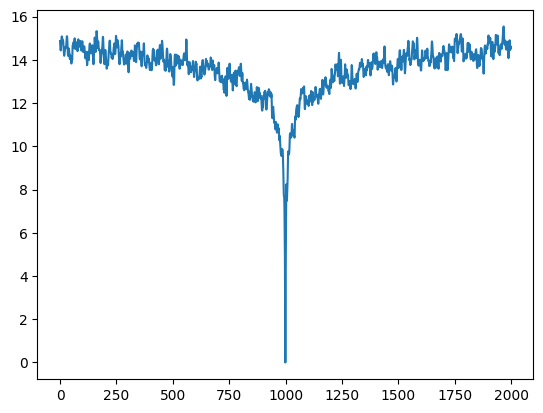

In [33]:
plt.plot(distances[999])

# Lets check for a sequence of 10,000 words long

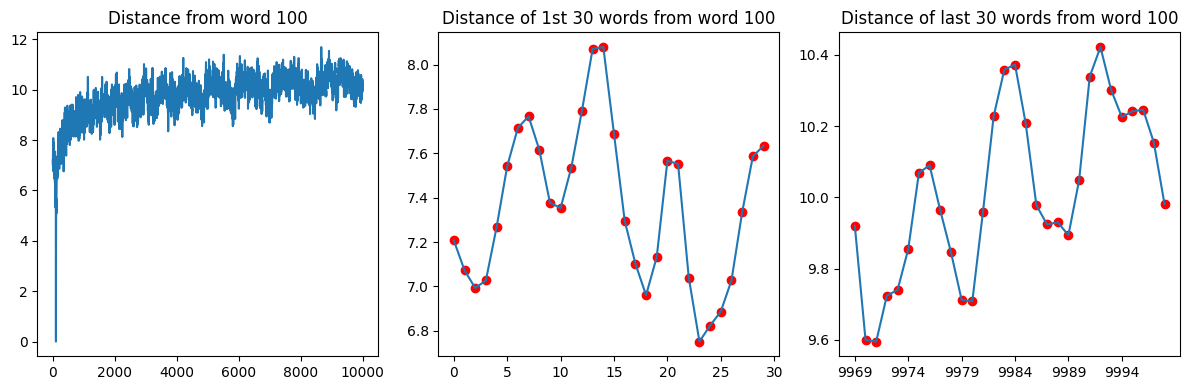

In [62]:
from scipy.spatial.distance import cdist

def plot_dist_of_word(word_pos, seq_length, embed_dim):
    positional_encoding = get_positional_encoding(seq_length, embed_dim)
    
    # Compute pairwise Euclidean distances
    distances = cdist(positional_encoding, positional_encoding, metric='euclidean')

    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    
    ax[0].plot(distances[word_pos])
    ax[1].plot(distances[word_pos, :30])
    ax[2].plot(distances[word_pos, -30:])

    # Plot points
    ax[1].scatter(np.arange(30), distances[word_pos, :30], color='red', label='Points')
    ax[2].scatter(np.arange(30), distances[word_pos, -30:], color='red', label='Points')

    ax[2].set_xticks(np.arange(0, 30, 5));ax[2].set_xticklabels(np.arange(seq_length-31, seq_length-1, 5))
    
    # Set titles and labels for each subplot
    ax[0].set_title(f'Distance from word {word_pos}')
    ax[1].set_title(f'Distance of 1st 30 words from word {word_pos}')
    ax[2].set_title(f'Distance of last 30 words from word {word_pos}')
    
    plt.tight_layout()
    
    plt.show()

plot_dist_of_word(100, 10000, 200)

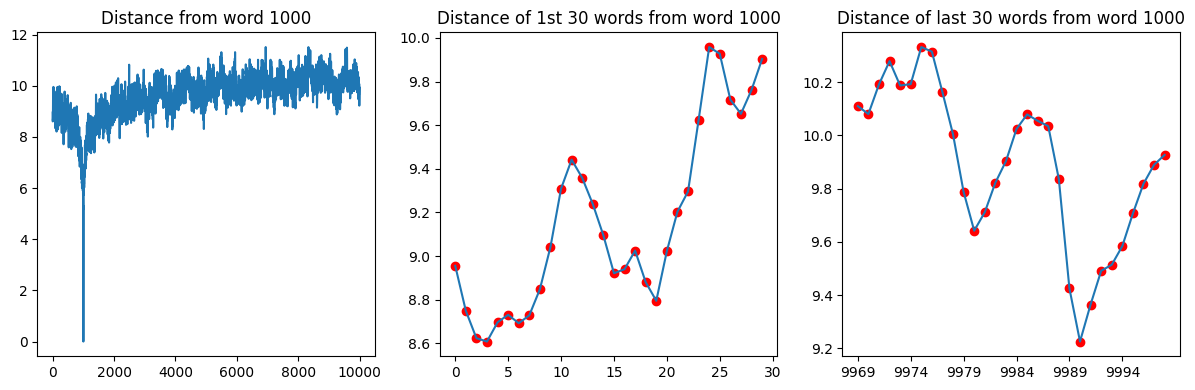

In [63]:
plot_dist_of_word(1000, 10000, 200)